In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import numpy as np

mpl.rc('font', family = 'Gulim')
mpl.rcParams['axes.unicode_minus']=False

In [2]:
a = pd.read_csv("Project_week.csv", encoding = "euc-kr")

In [3]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   주차      181 non-null    int64
 1   총확진     181 non-null    int64
 2   서울확진    181 non-null    int64
 3   부산확진    181 non-null    int64
 4   대구확진    181 non-null    int64
 5   인천확진    181 non-null    int64
 6   광주확진    181 non-null    int64
 7   대전확진    181 non-null    int64
 8   울산확진    181 non-null    int64
 9   세종확진    181 non-null    int64
 10  경기확진    181 non-null    int64
 11  강원확진    181 non-null    int64
 12  충북확진    181 non-null    int64
 13  충남확진    181 non-null    int64
 14  전북확진    181 non-null    int64
 15  전남확진    181 non-null    int64
 16  경북확진    181 non-null    int64
 17  경남확진    181 non-null    int64
 18  제주확진    181 non-null    int64
 19  총사망     181 non-null    int64
 20  서울사망    181 non-null    int64
 21  부산사망    181 non-null    int64
 22  대구사망    181 non-null    int64
 23  인천사망    181 non

In [4]:
a1 = a.iloc[:,[0,1 ,19]]

In [5]:
a1

,주차,총확진,총사망
0,1,3,0
1,2,11,0
2,3,13,0
3,4,2,0
4,5,733,7
...,...,...,...
176,177,115063,66
177,178,113854,67
178,179,113141,57
179,180,124543,54


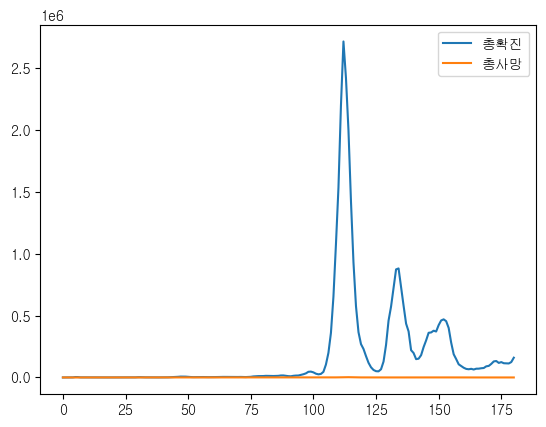

In [6]:
a1["총확진"].plot()
a1["총사망"].plot()
plt.legend()
plt.show()

In [7]:
b = pd.read_csv("Projecti_population.csv", encoding = "euc-kr")

b = b.transpose()
b.columns = ["전국","서울","부산","대구","인천","광주","대전","울산","세종","경기","강원","충북","충남",
            "전북","전남","경북","경남","제주"]
b =b.iloc[1:]
b = b.astype(int)
b = (b/10000).astype(int)

b_des = b.describe()

population = b_des.iloc[5].astype(int)
population = population * 10000
population

전국    51660000
서울     9530000
부산     3350000
대구     2390000
인천     2950000
광주     1440000
대전     1450000
울산     1120000
세종      360000
경기    13540000
강원     1530000
충북     1590000
충남     2110000
전북     1780000
전남     1830000
경북     2620000
경남     3310000
제주      670000
Name: 50%, dtype: int32

In [8]:
a1.columns = ["week", "I", "D"]
a1["S"] = 0
a1["E"] = 0
a1["R"] = 0
a1 = a1[["week","S","E","I","R","D"]]

C:\Users\lg\AppData\Local\Temp\ipykernel_17844\1160892301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a1["S"] = 0
C:\Users\lg\AppData\Local\Temp\ipykernel_17844\1160892301.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a1["E"] = 0
C:\Users\lg\AppData\Local\Temp\ipykernel_17844\1160892301.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [9]:
# 잠복기를 1주일~2주일이라고 가정
# E 데이터는 다음주 I + 다다음주 I
for i in range(len(a1) - 2):
    a1.iloc[i,2] = a1.iloc[i + 1, 3] + a1.iloc[i + 2 , 3]

In [10]:
a1

,week,S,E,I,R,D
0,1,0,24,3,0,0
1,2,0,15,11,0,0
2,3,0,735,13,0,0
3,4,0,4182,2,0,0
4,5,0,6619,733,0,7
...,...,...,...,...,...,...
176,177,0,226995,115063,0,66
177,178,0,237684,113854,0,67
178,179,0,284282,113141,0,57
179,180,0,0,124543,0,54


In [11]:
# I 인 사람은 1주일 후에 회복이라고 가정
# R 데이터는 지난주 I - 이번주 D
for i in range(1, len(a1)):
    a1.iloc[i,-2] = a1.iloc[i-1,-2] + a1.iloc[i-1,-3] - a1.iloc[i,-1]

In [12]:
a1

,week,S,E,I,R,D
0,1,0,24,3,0,0
1,2,0,15,11,3,0
2,3,0,735,13,14,0
3,4,0,4182,2,27,0
4,5,0,6619,733,22,7
...,...,...,...,...,...,...
176,177,0,226995,115063,31754623,66
177,178,0,237684,113854,31869619,67
178,179,0,284282,113141,31983416,57
179,180,0,0,124543,32096503,54


In [13]:
# 전체 인구수 = S + E + I + R + D
# S = 전체인구수 - (E + I + R + D)
a1.iloc[0,1] = population["전국"] - a1.iloc[0,2] - a1.iloc[0,3] - a1.iloc[0,4] - a1.iloc[0,5]
for i in range(1,len(a1)):
    a1.iloc[i,1] = a1.iloc[i-1, 1] - a1.iloc[i,2] - a1.iloc[i,3] - a1.iloc[i,4] - a1.iloc[i,5]

In [14]:
a1["D'"] = 0

In [15]:
a1["D'"] = a1["D"].cumsum()

In [16]:
a1 = a1.iloc[:,[0,1,2,3,4,6]]

In [17]:
a1.columns = [["week", "S", "E", "I", "R", "D"]]

In [18]:
a1

,week,S,E,I,R,D
0,1,51659973,24,3,0,0
1,2,51659944,15,11,3,0
2,3,51659182,735,13,14,0
3,4,51654971,4182,2,27,0
4,5,51647590,6619,733,22,7
...,...,...,...,...,...,...
176,177,-1650862427,226995,115063,31754623,34893
177,178,-1683083651,237684,113854,31869619,34960
178,179,-1715464547,284282,113141,31983416,35017
179,180,-1747685647,0,124543,32096503,35071


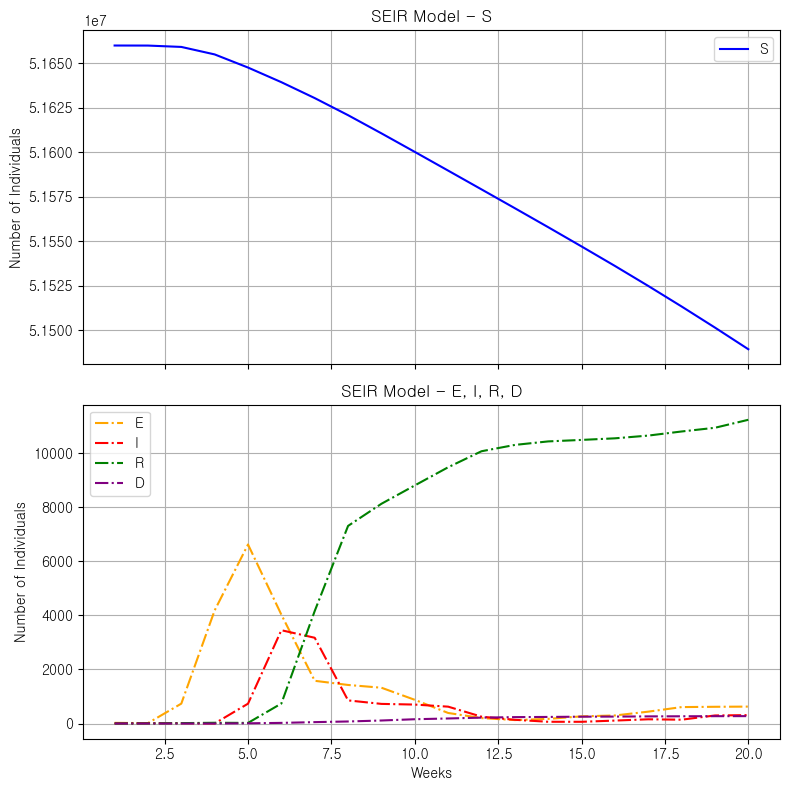

In [19]:
data = a1.iloc[:20]
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

ax1.plot(data['week'], data['S'], label='S', color='blue')
ax1.set_ylabel('Number of Individuals')
ax1.set_title('SEIR Model - S')

ax2.plot(data['week'], data['E'], label='E', color='orange', linestyle='-.')
ax2.plot(data['week'], data['I'], label='I', color='red', linestyle='-.')
ax2.plot(data['week'], data['R'], label='R', color='green', linestyle='-.')
ax2.plot(data['week'], data['D'], label='D', color='purple', linestyle='-.')
ax2.set_xlabel('Weeks')
ax2.set_ylabel('Number of Individuals')
ax2.set_title('SEIR Model - E, I, R, D')

ax1.legend()
ax1.grid()
ax2.legend()
ax2.grid()

plt.tight_layout()

plt.show()


In [20]:
data

,week,S,E,I,R,D
0,1,51659973,24,3,0,0
1,2,51659944,15,11,3,0
2,3,51659182,735,13,14,0
3,4,51654971,4182,2,27,0
4,5,51647590,6619,733,22,7
5,6,51639362,4024,3449,739,23
6,7,51630425,1579,3170,4160,51
7,8,51620816,1425,854,7306,75
8,9,51610608,1323,725,8124,111
9,10,51600183,876,700,8802,158


In [21]:
data.to_csv("Project_SEIRD_Kor.csv", index = False)